In [151]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [188]:
def draw_timeline(data, x, y_cols, kind='line', aspect=2, height=6, labels=None):

    if isinstance(y_cols, str):
        y_cols = [y_cols]

    if labels is None:
        labels = y_cols

    # melt в длинный формат
    melted = data.melt(id_vars=[x], value_vars=y_cols, var_name='metric', value_name='value')

    # подмена имён для легенды
    label_map = dict(zip(y_cols, labels))
    melted['metric'] = melted['metric'].map(label_map)

    # построение графика
    g = sns.relplot(
        data=melted,
        x=x, y='value',
        kind=kind,
        hue='metric',
        aspect=aspect,
        height=height
    )

    g.set_xticklabels(rotation=90, horizontalalignment="right", step=1)
    
    g._legend.set_title("")
    g._legend.set_bbox_to_anchor((0.5, 1.15))
    g._legend._loc = 9  # 9 = 'upper center'
    g._legend.set_frame_on(False)
    plt.tight_layout()


## 1 
- Загрузите датасет VIX с использованием Pandas. 
- Убедитесь, что данные правильно интерпретируются, особенно дата.
- Преобразуйте данные, чтобы они имели нужный формат для анализа (например, установите колонку с датой как индекс).
- Постройте простой график временного ряда для колонки Close.
- Для выделения тренда добавьте скользящее среднее (например, на 7 дней) для значений Close и постройте график.
- Используйте метод resample для агрегации данных по месяцам и постройте график средних значений Close по месяцам.
- Используйте Seaborn для построения графика с доверительным интервалом (95% CI) для значений Close .
- Используйте метод IQR для определения выбросов и выделите их на графике. Для выбросов выберите значения, которые значительно отклоняются от основной тенденции.

In [185]:
df = pd.read_csv('../data/02-1-vix-daily.csv')
df['DATE'] = pd.to_datetime(df['DATE'])
df.sample(5)

,DATE,OPEN,HIGH,LOW,CLOSE
914,1993-08-13,12.80,13.25,12.17,12.19
8018,2021-11-01,16.85,17.70,16.32,16.41
1372,1995-06-07,13.22,13.99,12.78,12.84
4027,2005-12-22,10.82,10.89,10.28,10.29
7860,2021-03-18,18.95,22.60,18.95,21.58


In [186]:
# Rolling
df['CLOSE_ROLL_AVG'] = df['CLOSE'].rolling(window=7).mean()

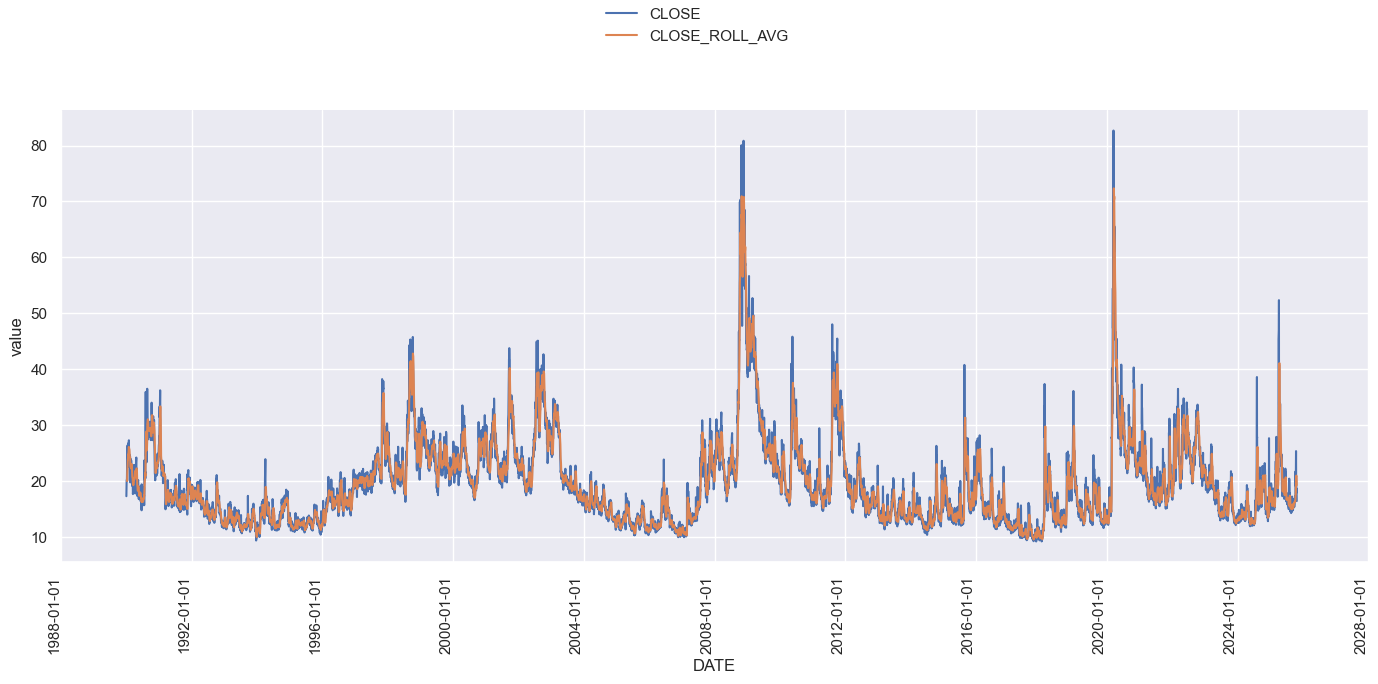

In [189]:
draw_timeline(df, x='DATE', y_cols=['CLOSE', 'CLOSE_ROLL_AVG'])

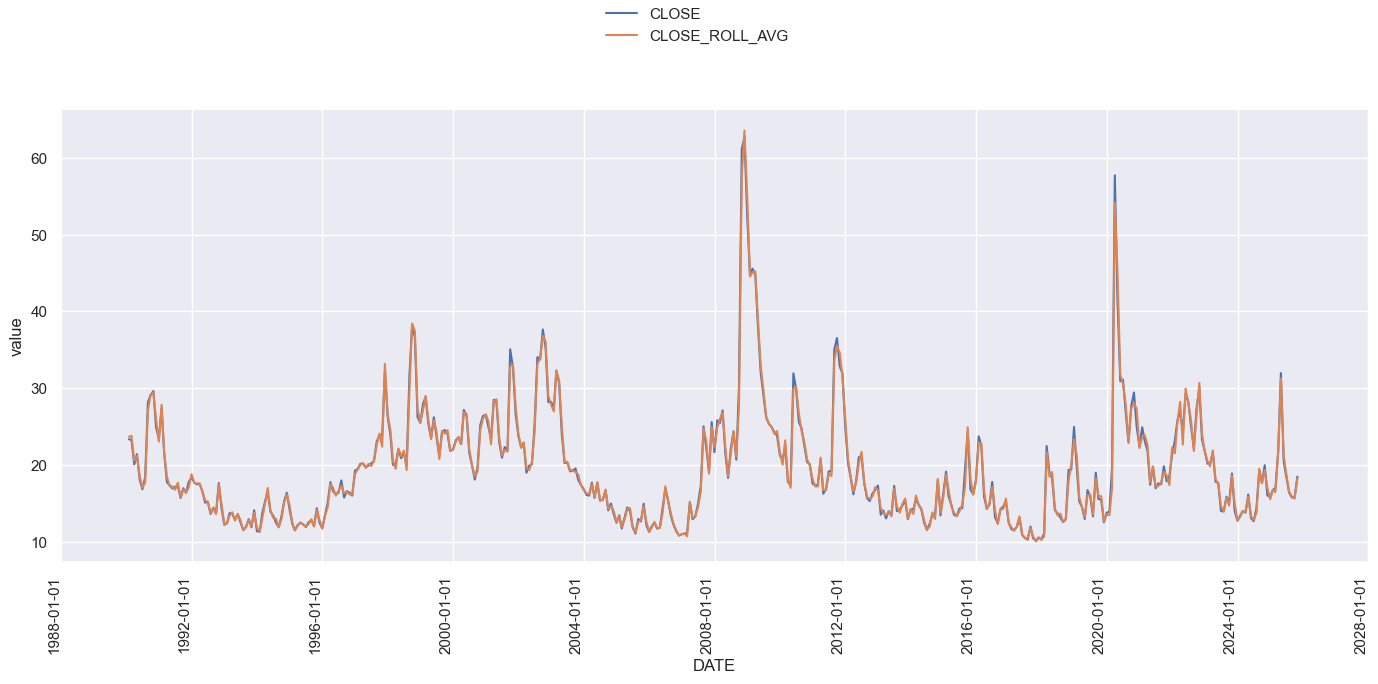

In [190]:
# Agg by month
df_monthly = df.resample('ME', on='DATE').mean()
df_monthly.reset_index(inplace=True)
draw_timeline(df_monthly, x='DATE', y_cols=['CLOSE', 'CLOSE_ROLL_AVG'])

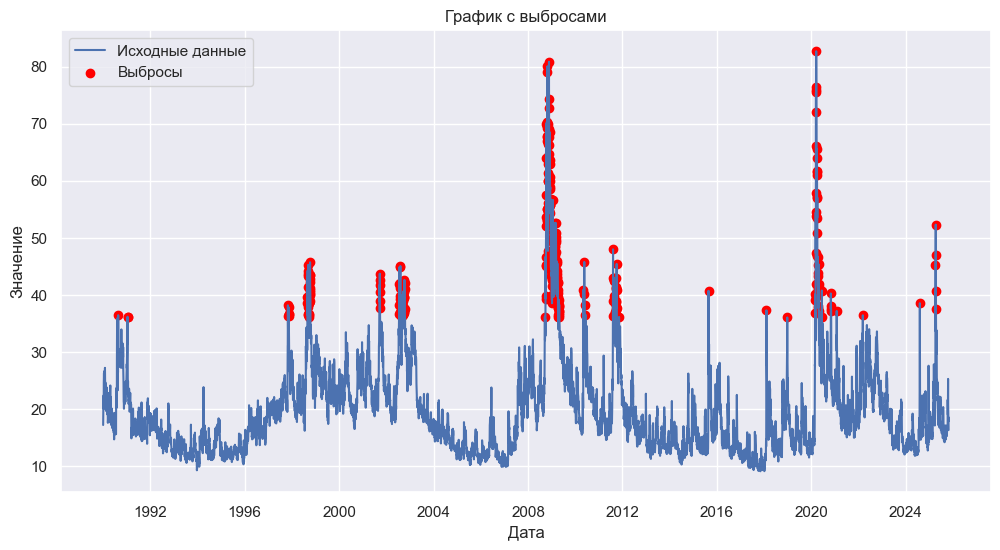

In [191]:
# Outliers
q1 = df['CLOSE'].quantile(0.25)
q3 = df['CLOSE'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = df[(df['CLOSE'] < lower_bound) | (df['CLOSE'] > upper_bound)]

plt.figure(figsize=(12, 6))
plt.plot(df['DATE'], df['CLOSE'], label='Исходные данные')
plt.scatter(outliers['DATE'], outliers['CLOSE'], color='red', label='Выбросы')
plt.title('График с выбросами')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.grid(True)
plt.show()